## Importing Libraries


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!wget https://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv
#weather_df = pd.read_csv(r'G:/The_Code_Work/Cab_Surge/weather.csv')

In [ ]:
#cab_df = pd.read_csv(r'G:/The_Code_Work/Cab_Surge/cab_rides.csv')

## Memory Usage reduction 

In [ ]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
          

### Load The Data

In [ ]:
cab_data = pd.read_csv("/content/drive/MyDrive/cab_rides.csv")
cab_data=reduce_mem_usage(cab_data)
weather_data = pd.read_csv("/content/drive/MyDrive/weather.csv")
weather_data=reduce_mem_usage(weather_data)


Memory usage of dataframe is 52.88 MB
Memory usage after optimization is: 40.49 MB
Decreased by 23.4%
Memory usage of dataframe is 0.38 MB
Memory usage after optimization is: 0.10 MB
Decreased by 73.3%


## EDA Part

In [ ]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [ ]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [ ]:
import datetime
cab_data['datetime']= pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['date_time'] = pd.to_datetime(weather_data['time_stamp'])

In [ ]:
cab_data.shape

(693071, 11)

In [ ]:
weather_data.shape

(6276, 9)

In [ ]:
a=pd.concat([cab_data,weather_data])

In [ ]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time
0,0.439941,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,0.439941,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,0.439941,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,0.439941,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,0.439941,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
a['day']=a.date_time.dt.day
a['hour']=a.date_time.dt.hour

In [ ]:
a.fillna(0,inplace=True)

In [32]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

DATA VISUALIZATION

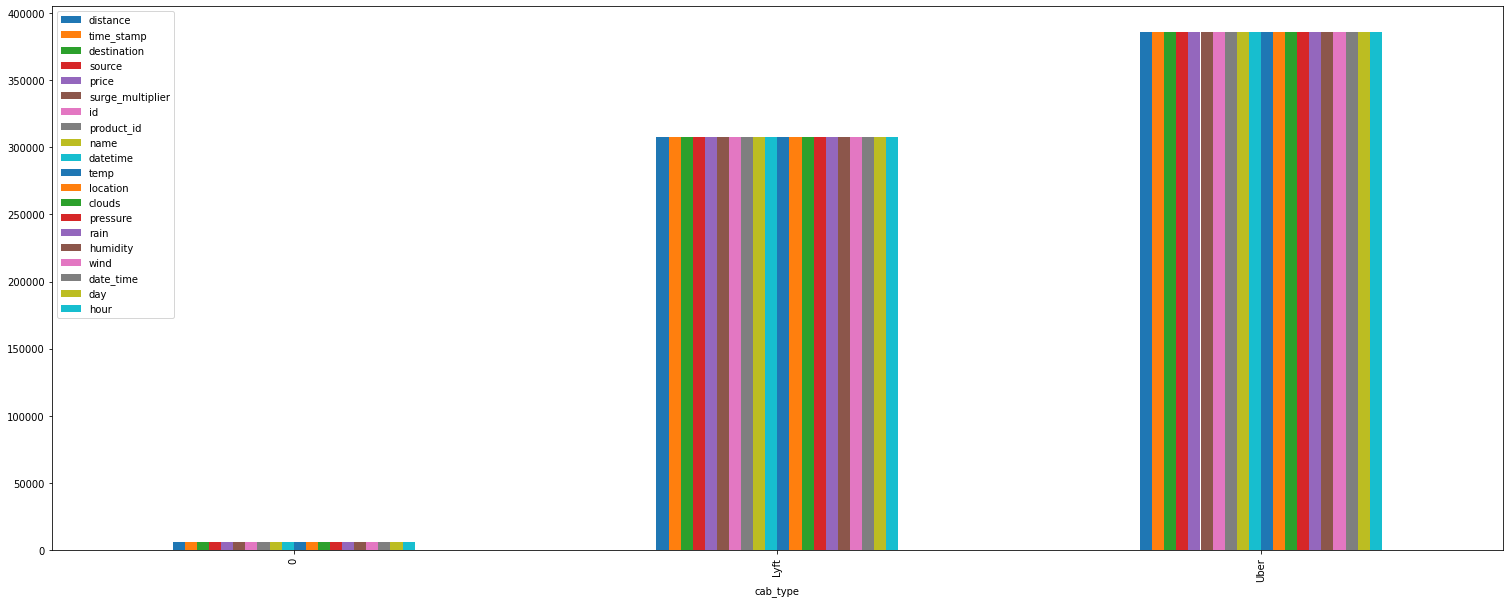

In [33]:
b= pd.DataFrame(a.groupby('cab_type').count())
b.plot(kind='bar',figsize=(26,10))

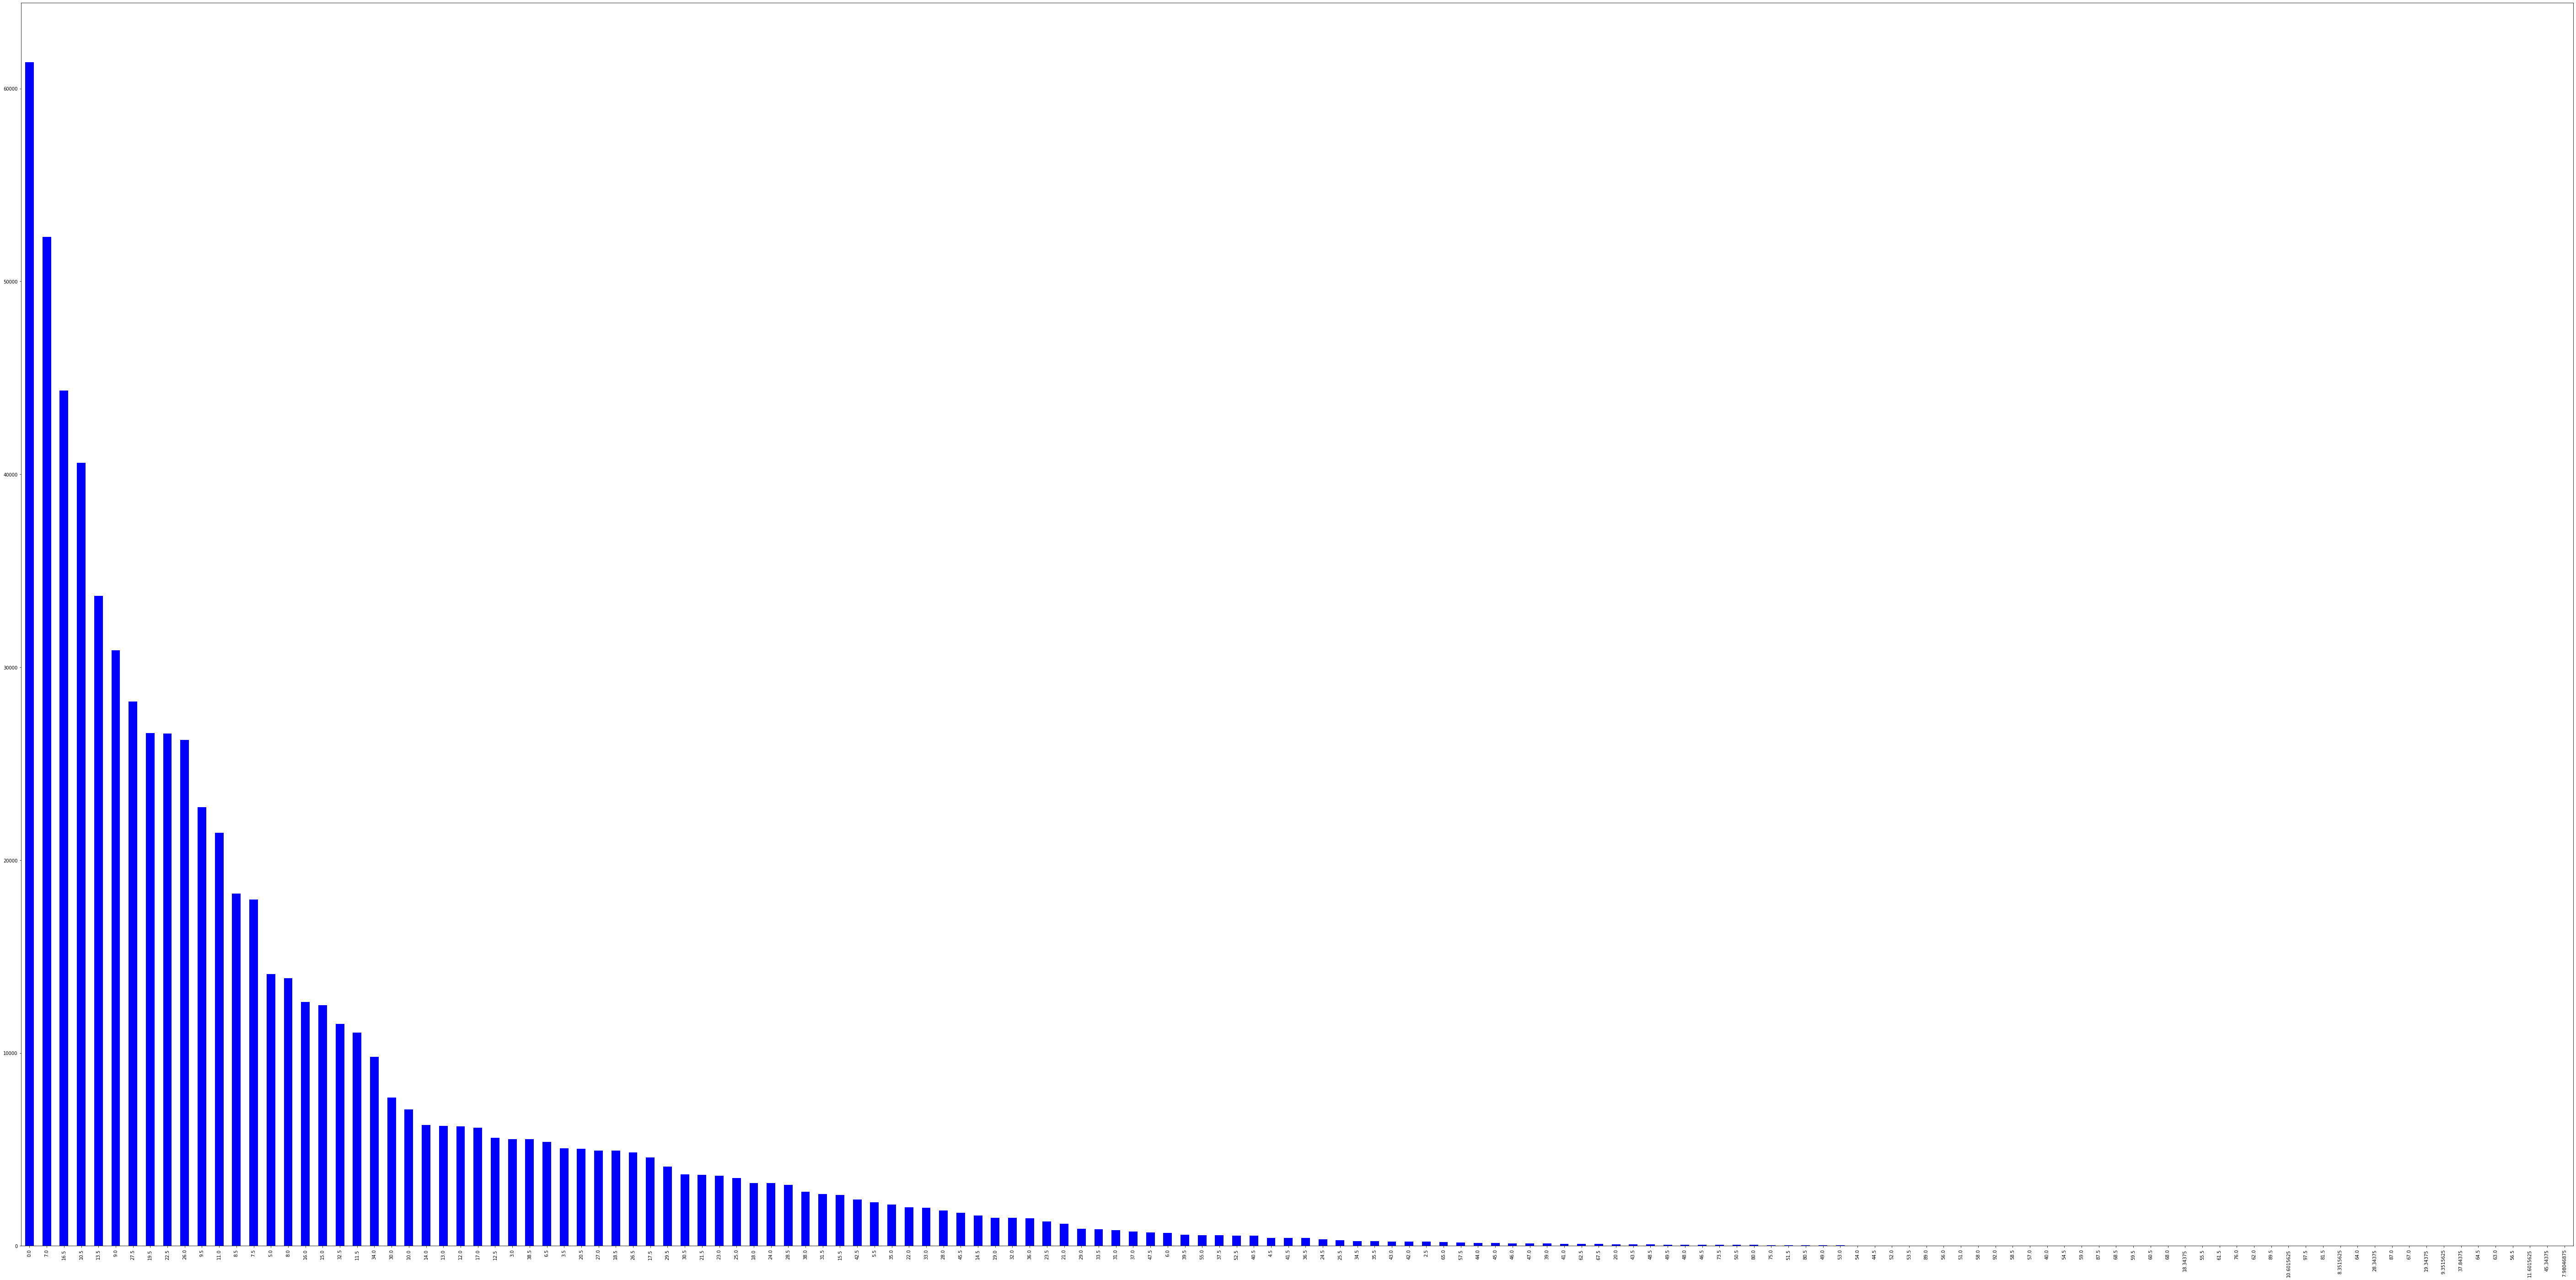

In [ ]:
a['price'].value_counts().plot(kind='bar',figsize=(100,50),color='blue')
                            

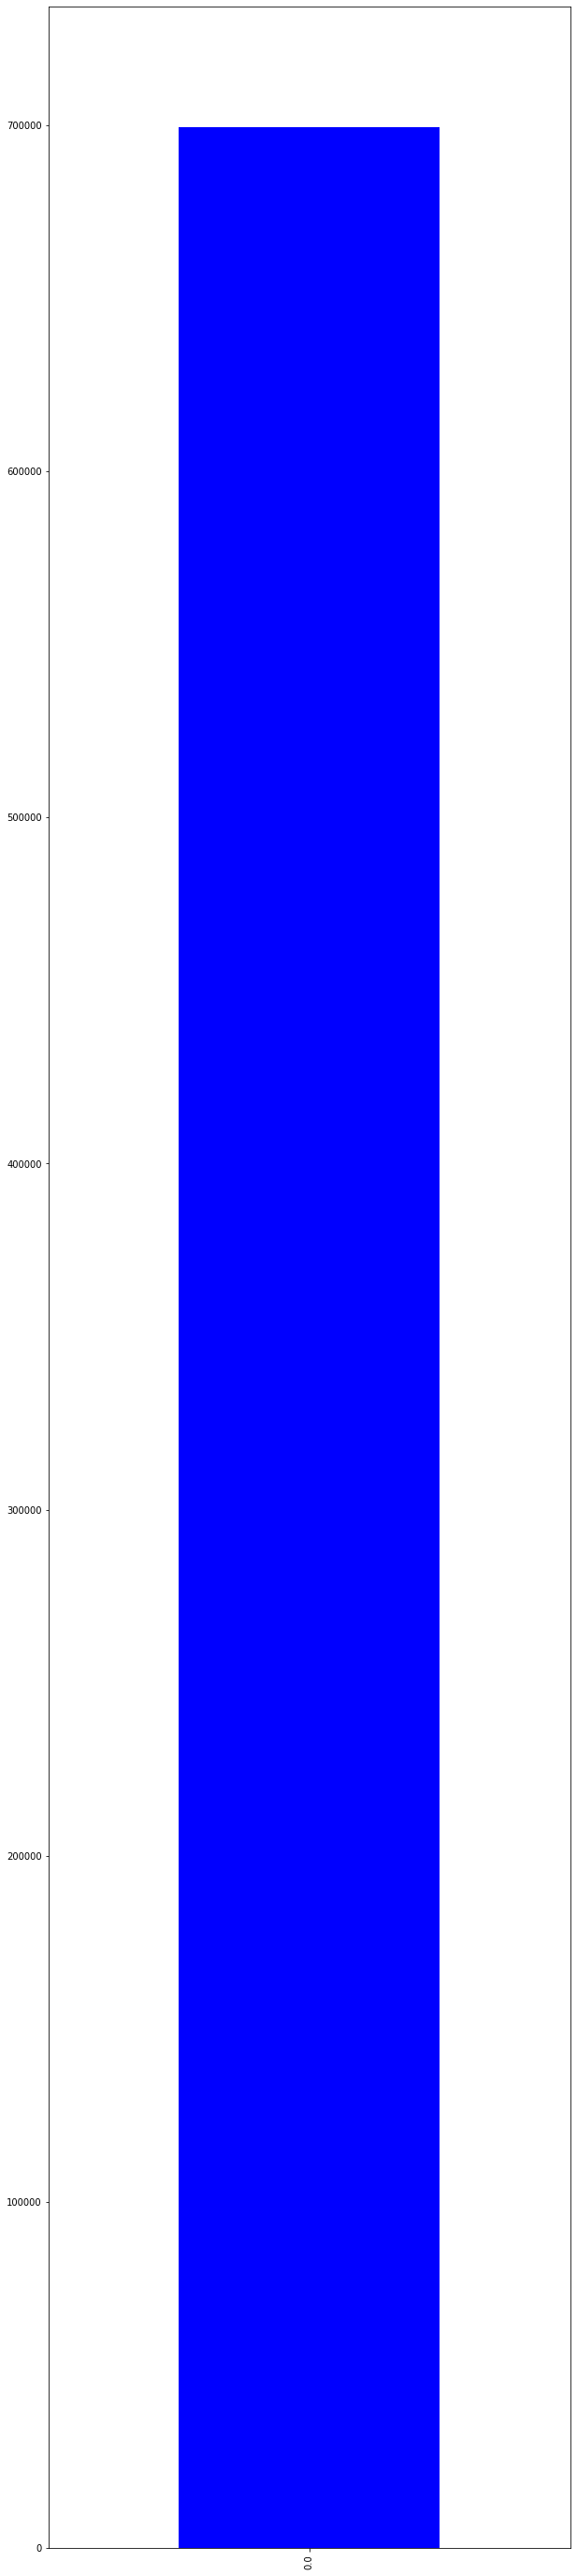

In [ ]:
a['hour'].value_counts().plot(kind='bar',figsize=(10,50),color='blue')

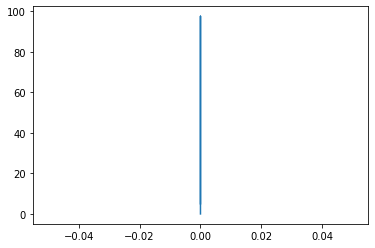

In [ ]:
import matplotlib.pyplot as plt
x=a['hour']
y=a['price']
plt.plot(x,y)
plt.show()

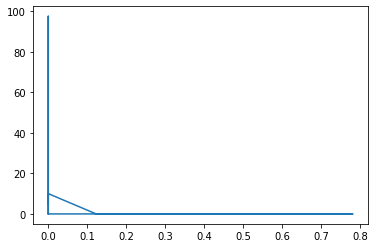

In [ ]:
x=a['rain']
y=a['price']
plt.plot(x,y)
plt.show()

In [ ]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [ ]:
x1=a[['distance','temp','pressure','humidity','wind','rain','day','hour','surge_multiplier','clouds']]
y1=a['price']

In [ ]:
#Using Skicit_learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train,y_train,x_test,y_test=  train_test_split(x1,y1,test_size = 0.25,random_state = 42)

In [ ]:
linear = LinearRegression()
linear.fit(x_train,x_test)

LinearRegression()

In [ ]:
predictions=linear.predict(y_train)
predictions

array([32.5466483 , 14.75715258, 16.81491085, ..., 11.82956896,
       11.85442111, 13.22874517])

In [ ]:
df = pd.DataFrame({'Actual': y_test,'predicted': predictions})
df

,Actual,predicted
81607,42.5,32.546648
354,0.0,14.757153
471801,32.5,16.814911
407645,27.5,10.480097
474760,27.5,10.556517
...,...,...
538489,7.5,10.708737
579511,13.5,15.517628
5421,9.0,11.829569
279982,8.0,11.854421


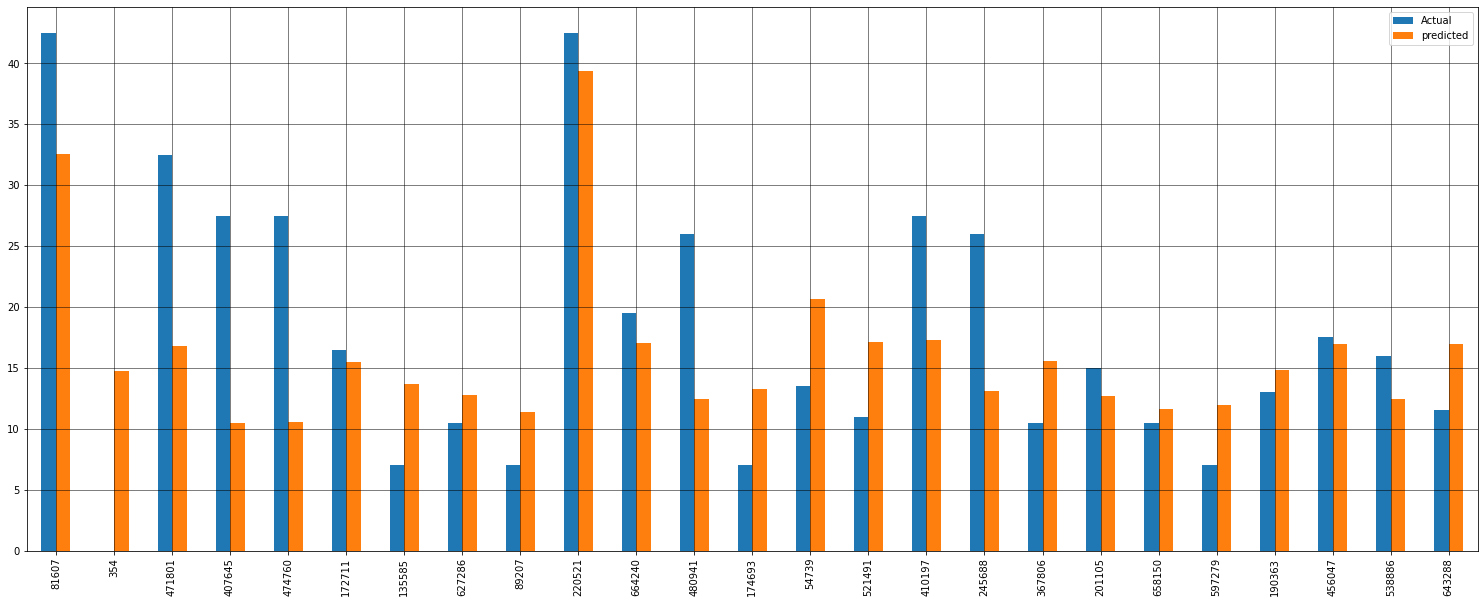

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='black')
plt.show()

In [ ]:
#Import metrics library
from sklearn import metrics

# Print the results of MAE
print(metrics.mean_absolute_error(y_test,predictions))

#Print result of MSE
print(metrics.mean_squared_error(y_test,predictions))

#Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

7.407737908769832
85.34728630899404
9.23835950312576
